In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy.table import Table
import data_management
import ratios_z
import ratios_ha
import ratios_o32
import line_coverage

SPHINX_DATA = Path('/Users/njc5787/Research/SPHINX-20-data/data').resolve()
RUBIES_DATA = Path('../data').resolve()
FIGURES = Path('./figures').resolve()

LINE_SIGNAL_TO_NOISE = 3

RUBY_HEXCODE = '#E0115F'
GRATING_COLORS = [RUBY_HEXCODE, 'k']
COLORS = ['#CC79A7', '#D55E00', '#0072B2', '#56B4E9', '#009E73', '#E69F00', '#000000', '#F0E442',]
PRISM_COLOR = COLORS[2]
G395M_COLOR = COLORS[1]

OII_COLOR = COLORS[0]
NEIII_COLOR = COLORS[1]
HB_COLOR = COLORS[2]
OIII_4959_COLOR = COLORS[3]
OIII_5007_COLOR = COLORS[4]
HA_COLOR = COLORS[5]
SII_COLOR = COLORS[5]


In [2]:
line_fluxes = pd.read_csv(RUBIES_DATA.joinpath('line_flux_df.csv'), index_col=0)
line_fluxes_prism = data_management.make_df_prism(line_fluxes)
line_fluxes_g395m = data_management.make_df_g395m(line_fluxes)

O32df_prism = data_management.signal_to_noise_O32_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
O32df_g395m = data_management.signal_to_noise_O32_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
O32df_both = pd.merge(O32df_prism, O32df_g395m, on='id', how='inner')

O32Hadf_prism = data_management.signal_to_noise_O32Ha_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
O32Hadf_g395m = data_management.signal_to_noise_O32Ha_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
O32Hadf_both = pd.merge(O32Hadf_prism, O32Hadf_g395m, on='id', how='inner')

R23df_prism = data_management.signal_to_noise_R23_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
R23df_g395m = data_management.signal_to_noise_R23_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
R23df_both = pd.merge(R23df_prism, R23df_g395m, on='id', how='inner')

R23Hadf_prism = data_management.signal_to_noise_R23Ha_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
R23Hadf_g395m = data_management.signal_to_noise_R23Ha_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
R23Hadf_both = pd.merge(R23Hadf_prism, R23Hadf_g395m, on='id', how='inner')

O3Hbdf_prism = data_management.signal_to_noise_O3Hb_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
O3Hbdf_g395m = data_management.signal_to_noise_O3Hb_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
O3Hbdf_both = pd.merge(O3Hbdf_prism, O3Hbdf_g395m, on='id', how='inner')

O3HbHadf_prism = data_management.signal_to_noise_O3HbHa_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
O3HbHadf_g395m = data_management.signal_to_noise_O3HbHa_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
O3HbHadf_both = pd.merge(O3HbHadf_prism, O3HbHadf_g395m, on='id', how='inner')

Ne3O2df_prism = data_management.signal_to_noise_Ne3O2_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
Ne3O2df_g395m = data_management.signal_to_noise_Ne3O2_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
Ne3O2df_both = pd.merge(Ne3O2df_prism, Ne3O2df_g395m, on='id', how='inner')

Ne3O2Hadf_prism = data_management.signal_to_noise_Ne3O2Ha_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
Ne3O2Hadf_g395m = data_management.signal_to_noise_Ne3O2Ha_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
Ne3O2Hadf_both = pd.merge(Ne3O2Hadf_prism, Ne3O2Hadf_g395m, on='id', how='inner')

Ne3O32df_prism = data_management.signal_to_noise_Ne3O32_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)
Ne3O32df_g395m = data_management.signal_to_noise_Ne3O32_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)
Ne3O32df_both = pd.merge(Ne3O32df_prism, Ne3O32df_g395m, on='id', how='inner')

Hadf_prism = line_fluxes_prism[data_management.signal_to_noise_Ha_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)]
Hadf_g395m = line_fluxes_g395m[data_management.signal_to_noise_Ha_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)]
Hadf_both = pd.merge(Hadf_prism, Hadf_g395m, on='id', how='inner')

Hbdf_prism = line_fluxes_prism[data_management.signal_to_noise_Hb_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)]
Hbdf_g395m = line_fluxes_g395m[data_management.signal_to_noise_Hb_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)]
Hbdf_both = pd.merge(Hbdf_prism, Hbdf_g395m, on='id', how='inner')


O3df_prism = line_fluxes_prism[data_management.signal_to_noise_5007_prism(line_fluxes_prism, LINE_SIGNAL_TO_NOISE)]
O3df_g395m = line_fluxes_g395m[data_management.signal_to_noise_5007_g395m(line_fluxes_g395m, LINE_SIGNAL_TO_NOISE)]
O3df_both = pd.merge(O3df_prism, O3df_g395m, on='id', how='inner')

sphinxdf = data_management.make_sphinx_df(SPHINX_DATA)
sphinx_binned = data_management.make_sphinx_binned_df(sphinxdf)



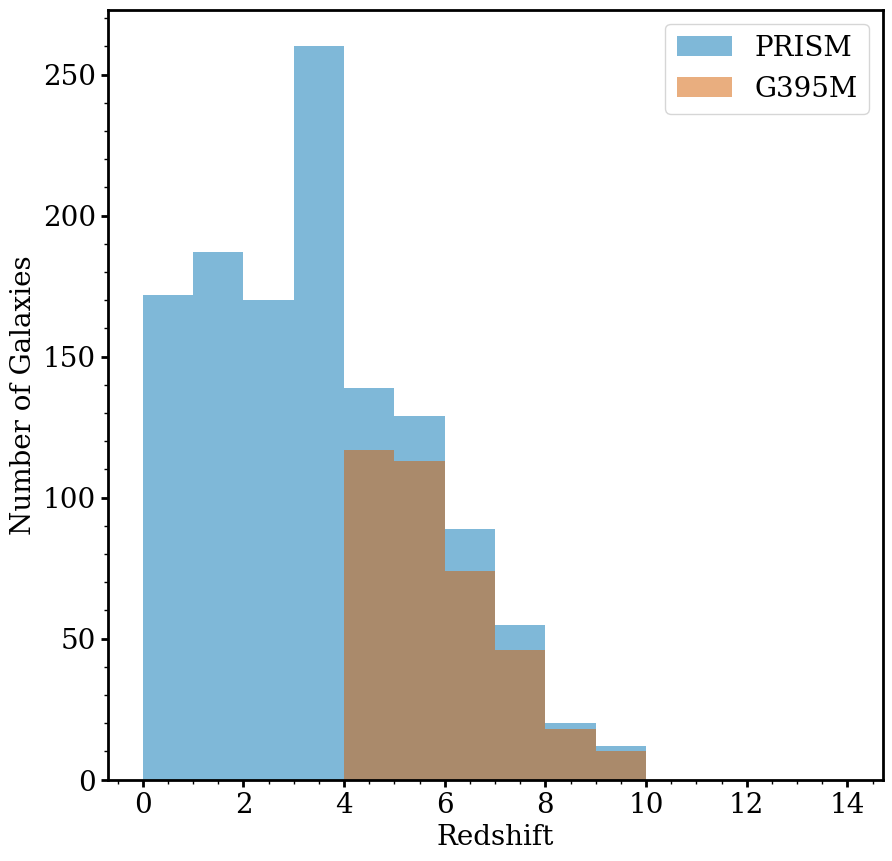

In [4]:
bins = np.arange(0,15,1)
plt.figure(figsize=(10,10))
plt.hist(line_fluxes_prism.z_prism, color=PRISM_COLOR, alpha=0.5, bins=bins, label='PRISM')
plt.hist(line_fluxes_g395m.z_g395m, color=G395M_COLOR, alpha=0.5, bins=bins, label='G395M')
plt.xlabel('Redshift')
plt.ylabel('Number of Galaxies')
plt.legend()
plt.savefig(FIGURES.joinpath('zhist.pdf'))
plt.show()

In [67]:
egs_photometry = list(RUBIES_DATA.glob('egs*sps*.fits'))
egs_photometrydf = (Table.read(egs_photometry[0], format='fits')
      .to_pandas()
)
uds_photometry = list(RUBIES_DATA.glob('uds*sps*.fits'))
uds_photometrydf = (Table.read(uds_photometry[0], format='fits')
      .to_pandas()
)

In [68]:
egs_photometrydf

,id,ra,dec,z_spec,z_16,z_50,z_84,mtot_16,mtot_50,mtot_84,...,UV_84,VJ_16,VJ_50,VJ_84,gi_16,gi_50,gi_84,ug_16,ug_50,ug_84
0,314,215.047219,52.873545,1.0792,1.066959,1.081151,1.093502,7.663324,7.959884,8.144108,...,0.571482,-0.322055,-0.197852,-0.061830,-0.114493,-0.033172,0.057216,0.368097,0.488109,0.643127
1,482,215.055700,52.881958,2.4795,2.466267,2.479461,2.492917,10.342180,10.546886,10.728413,...,1.516407,1.639147,1.717575,1.788404,1.209361,1.261519,1.315392,1.401962,1.486741,1.564780
2,761,215.048281,52.879975,3.4749,3.460055,3.473852,3.488612,8.999971,9.286930,9.565404,...,0.614665,0.157427,0.333753,0.524187,0.138138,0.183933,0.219282,0.445031,0.518839,0.602441
3,920,215.052344,52.884268,3.6213,3.606445,3.618377,3.634835,8.759178,9.008563,9.229348,...,0.335386,-0.328727,-0.104180,0.017901,-0.145954,-0.105428,-0.075021,0.285114,0.329636,0.365150
4,921,215.049804,52.882520,4.6191,4.606992,4.620721,4.633611,7.999528,8.249279,8.503069,...,0.507230,-0.245120,-0.027888,0.162618,-0.101650,-0.017435,0.053855,0.278632,0.370020,0.483905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,975193,214.967248,52.963630,6.9899,6.990930,7.001648,7.007428,8.124916,8.336600,8.582315,...,0.364252,-1.342373,-1.122922,-0.803765,-0.529217,-0.459257,-0.379925,-0.132223,-0.073191,-0.000226
632,978590,214.830660,52.887775,7.7616,7.747797,7.760693,7.774701,8.987303,9.334288,9.755920,...,1.200153,0.329156,0.861999,1.471908,0.431347,0.710257,1.050598,0.772538,0.956267,1.150985
633,980841,214.844770,52.892109,8.6937,8.680703,8.695250,8.707724,9.328617,9.623724,9.887245,...,0.739568,-0.194869,0.190751,0.642494,0.063064,0.219559,0.373995,0.349845,0.428431,0.510854
634,986615,214.950932,52.957040,6.5036,6.488228,6.499406,6.515163,8.763231,9.048732,9.360532,...,0.539225,-0.309389,-0.111038,0.118091,-0.107790,-0.006101,0.099194,0.397051,0.454037,0.514091


In [104]:
uds_photometrydf.columns

Index(['id_v70', 'id', 'ra', 'dec', 'z_spec', 'z_16', 'z_50', 'z_84',
       'mtot_16', 'mtot_50', 'mtot_84', 'mstar_16', 'mstar_50', 'mstar_84',
       'met_16', 'met_50', 'met_84', 'mwa_16', 'mwa_50', 'mwa_84', 'dust2_16',
       'dust2_50', 'dust2_84', 'dust_index_16', 'dust_index_50',
       'dust_index_84', 'dust1_fraction_16', 'dust1_fraction_50',
       'dust1_fraction_84', 'logfagn_16', 'logfagn_50', 'logfagn_84',
       'sfr10_16', 'sfr10_50', 'sfr10_84', 'sfr30_16', 'sfr30_50', 'sfr30_84',
       'sfr100_16', 'sfr100_50', 'sfr100_84', 'ssfr10_16', 'ssfr10_50',
       'ssfr10_84', 'ssfr30_16', 'ssfr30_50', 'ssfr30_84', 'ssfr100_16',
       'ssfr100_50', 'ssfr100_84', 'rest_U_16', 'rest_U_50', 'rest_U_84',
       'rest_V_16', 'rest_V_50', 'rest_V_84', 'rest_J_16', 'rest_J_50',
       'rest_J_84', 'rest_u_16', 'rest_u_50', 'rest_u_84', 'rest_g_16',
       'rest_g_50', 'rest_g_84', 'rest_i_16', 'rest_i_50', 'rest_i_84',
       'UV_16', 'UV_50', 'UV_84', 'VJ_16', 'VJ_50', 'VJ_84',

In [103]:
photometrydf = pd.concat([egs_photometrydf, uds_photometrydf])